# Big Data Mart Sales Problem


The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

     bigdatamart_Train.csv: Use this file for the model building purpose. 

     bigdatamart_Test.csv: Use this file for getting predictions from the trained model.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing both DATASET

In [2]:
bigdatamart_Train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
bigdatamart_Test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")

### Checking Top 5 rows Data of both Dataset

In [3]:
bigdatamart_Train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
bigdatamart_Test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# EDA

### Total Numbers of Rows and Column in both DataSet

In [5]:
bigdatamart_Train.shape

(8523, 12)

In [6]:
bigdatamart_Test.shape

(5681, 11)

### All Column Names of both Dataset

In [7]:
bigdatamart_Train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
bigdatamart_Test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

#### We can observe here that both Dataset have same type of data and columns, so will merge both Dataset using concat and will check top 5 rows of concatenate Dataset

In [9]:
data_mart=pd.concat([bigdatamart_Train,bigdatamart_Test],ignore_index=True)
data_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Checking all colums name after concatenate

In [10]:
data_mart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Checking Data Type of columns

In [11]:
data_mart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Checking Null Values in Dataset

In [12]:
data_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

##### So, we can see there are many null values present in out Dataset but in only 3 columns i.e; "Item_Weight", "Outlet_Size" and "Item_Outlet_Sales". We will handle that missing values.

# Information about Data (Memory Used and Data Types)

In [13]:
data_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


# Data Cleaning and preprocessing

Since there are Null values in the dataset, so we need to treat them.

# Handling Null Values

Filling Null Values of "Item_Weight" column in dataset by mean value

In [14]:
data_mart["Item_Weight"].fillna(data_mart["Item_Weight"].mean(), inplace=True)

Filling Null Values of "Outlet_Size" column in dataset by mode value

In [15]:
#checking all values present in column "Outlet_Size"

data_mart["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [16]:
#checking that value which is repeated in column "Outlet_Size"
print(data_mart["Outlet_Size"].mode())

0    Medium
dtype: object


In [17]:
# So, now we will use "Medium" value to fill Null values.
data_mart["Outlet_Size"].fillna(data_mart["Outlet_Size"].mode()[0], inplace=True)

Filling Null Values of "Item_Outlet_Sales" column in dataset by mean value

In [18]:
data_mart["Item_Outlet_Sales"].fillna(data_mart["Item_Outlet_Sales"].mean(), inplace=True)

##### Checking NULL VALUES after filling null values

In [19]:
data_mart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Here, we can see all Null Values are handelled, now there is no null value present in any column, we will proceed.

##### We will also check for any blank value present in our Target Column or not

In [20]:
data_mart[data_mart['Item_Outlet_Sales'] == ''].index

Int64Index([], dtype='int64')

In [21]:
data_mart['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

We can Observe in column name "Item_Fat_Content" have some irregularities. So, we will also fix it.

In [22]:
data_mart['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [23]:
data_mart['Item_Fat_Content']= data_mart['Item_Fat_Content'].astype(str)

Now Checking Values of column "Item_Fat_Content" again that irregularities are removed or not

In [24]:
data_mart['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

So, we can see irregularities are removed now.


## Descriptive Statistics

In [25]:
# Describing Data : works only on continuous column and do not work on categorical column
data_mart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.234226,0.051459,62.086938,8.371664,1321.864430
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,1468.089000
50%,12.792854,0.054021,142.247000,1999.000000,2181.288914
75%,16.000000,0.094037,185.855600,2004.000000,2181.288914
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


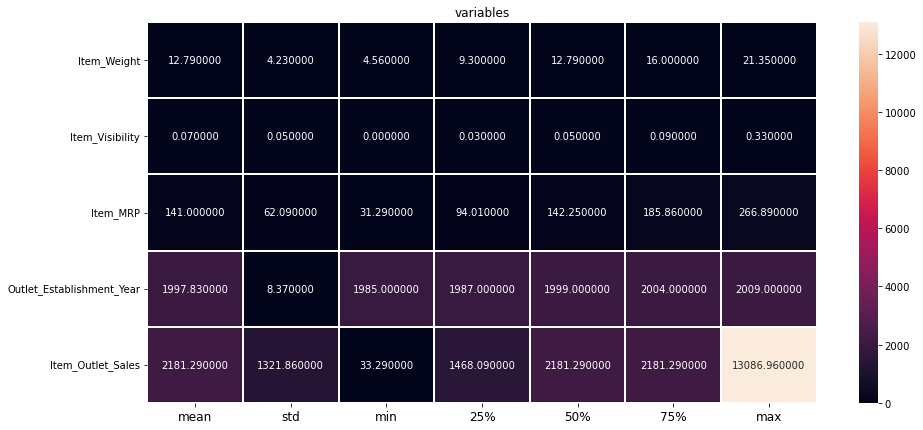

In [26]:
#checking description through heatmap also.
plt.figure(figsize=(15,7))
sns.heatmap(round(data_mart.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('variables')
plt.show()

### Outcome of Describe of Datasets:

We are determining Mean, Standard Deviation, Minimum and Maximum Values of each column. The summary of this dataset looks good as there are no negative/ invalid value present.

Total No of Rows: 14204

1.Item_Weight:

   Mean= 12.792854, std= 4.234226, Min= 4.555000, Max= 21.350000

2.Item_Visibility:

   Mean= 0.065953, std= 0.051459, Min= 0.000000, Max= 0.328391

3.Item_MRP:

   Mean= 141.004977, std= 62.086938, Min= 31.290000, Max= 266.888400

4.Outlet_Establishment_Year:
   
   Mean= 1997.830681, std= 8.371664, Min= 1985.000000, Max= 2009.000000

5.Item_Outlet_Sales:
   
   Mean= 2181.288914, std= 1321.864430, Min= 33.290000, Max= 13086.964800

We can observe that the dataset seems to be having more outliers as well as skewness in the data on the basis of Quantile median result.

# Data Visualization

### Using Countplot for categorical columns

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

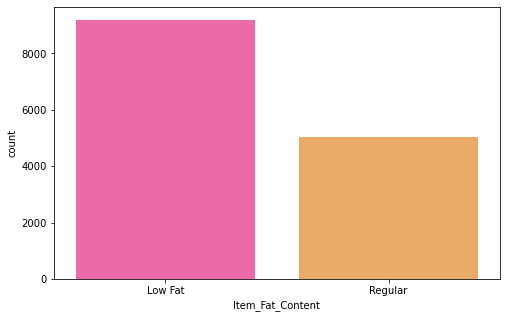

In [27]:
print(data_mart["Item_Fat_Content"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=data_mart,palette='spring')

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

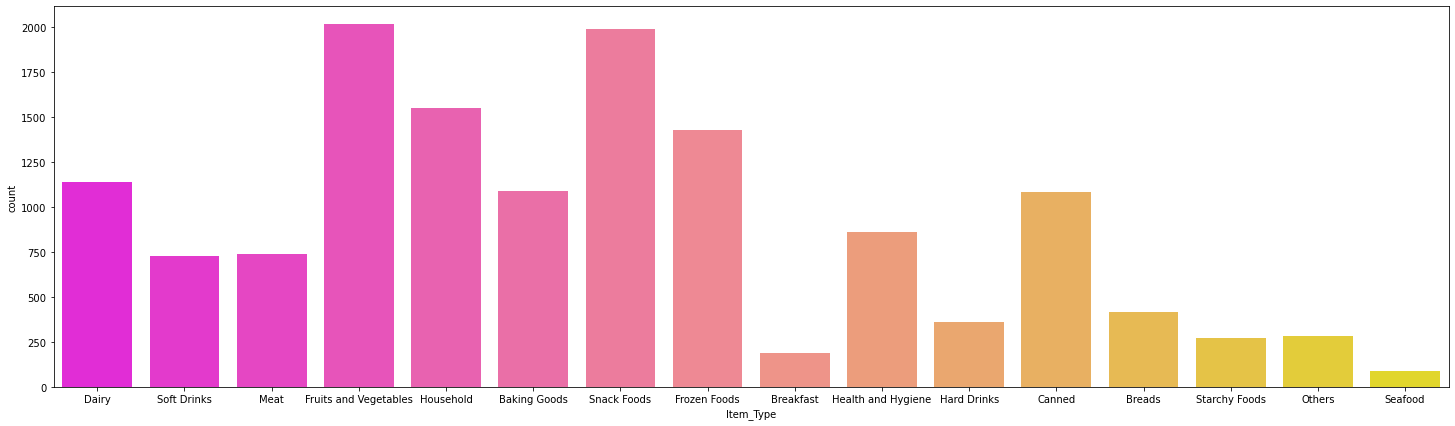

In [28]:
print(data_mart["Item_Type"].value_counts())
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=data_mart,palette='spring')

Fruits and Vegetables are purchased most and Seafood is purchased less

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

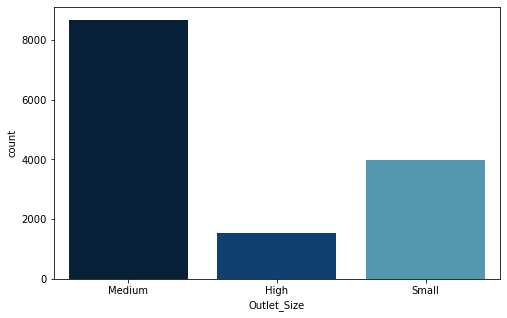

In [29]:
print(data_mart["Outlet_Size"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=data_mart,palette='ocean')

Medium Outlet size is used more compare to high and small.

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

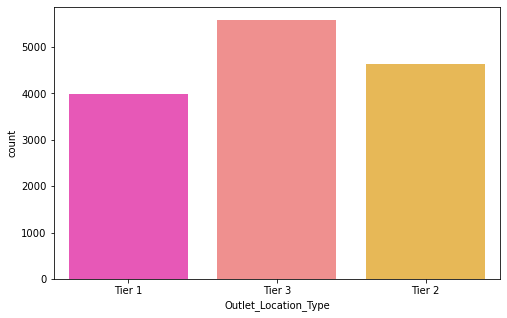

In [30]:
print(data_mart["Outlet_Location_Type"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=data_mart,palette='spring')

Outlet Tier 3 location is used more compare to Tier 2 and Tier 3

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

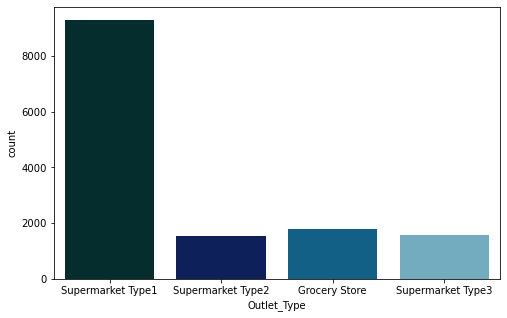

In [31]:
print(data_mart["Outlet_Type"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=data_mart,palette='ocean')

Supermarket Type 1 outlet is used most compare to Grocery Store, Supermarket Type 2 and Supermarket Type 3

# Bivariate Analysis

### Using Barplot for comparision of Features Column with Target Column

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

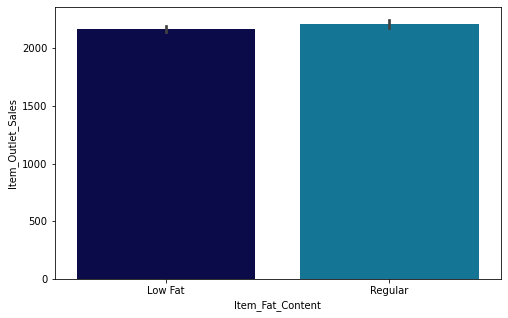

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=data_mart,palette='ocean')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

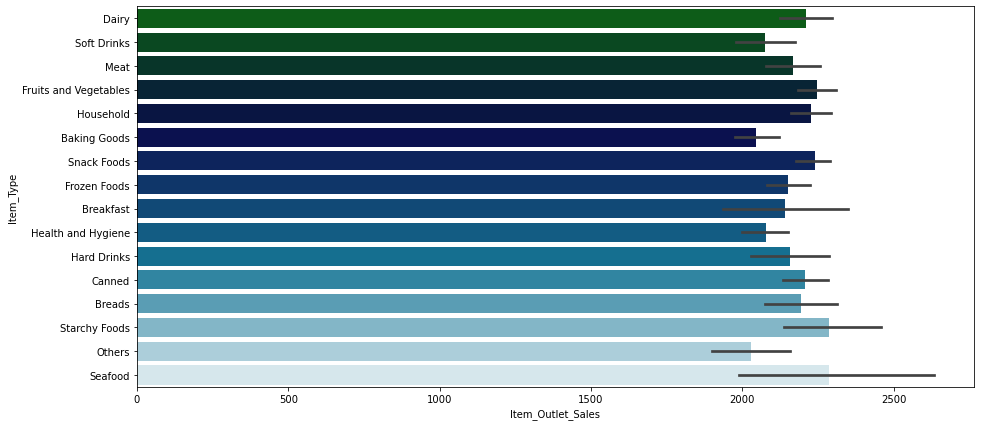

In [33]:
plt.figure(figsize=(15,7))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=data_mart,palette='ocean')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Identifier'>

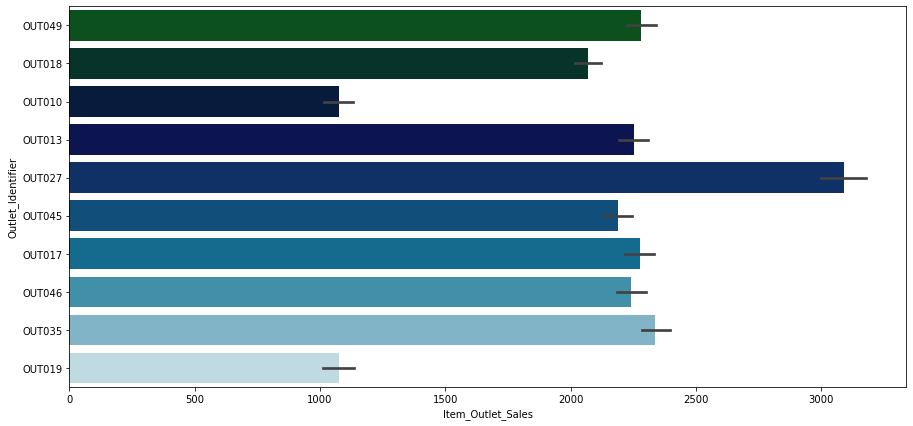

In [34]:
plt.figure(figsize=(15,7))
sns.barplot(y='Outlet_Identifier',x='Item_Outlet_Sales',data=data_mart,palette='ocean')

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

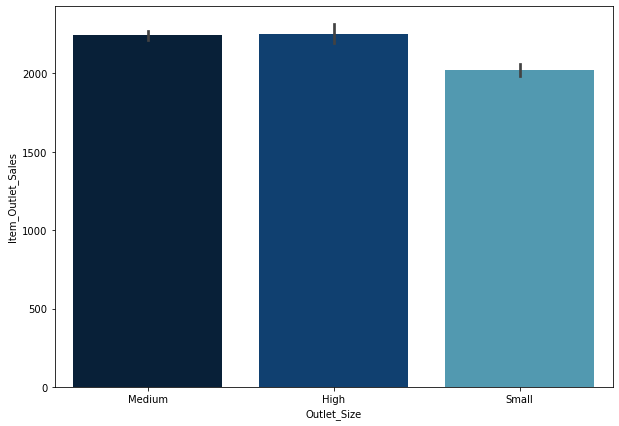

In [35]:
plt.figure(figsize=(10,7))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data_mart,palette='ocean')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

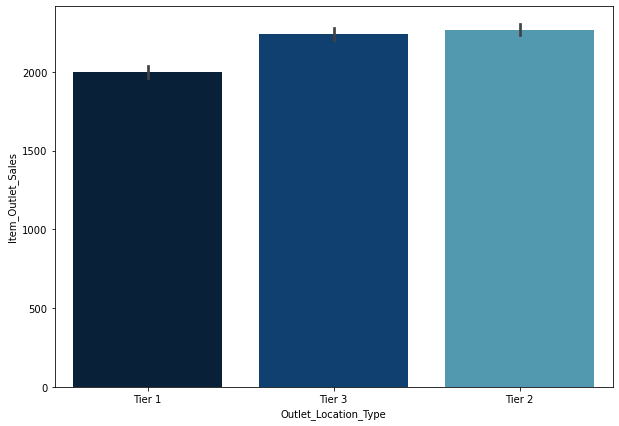

In [36]:
plt.figure(figsize=(10,7))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data_mart,palette='ocean')

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

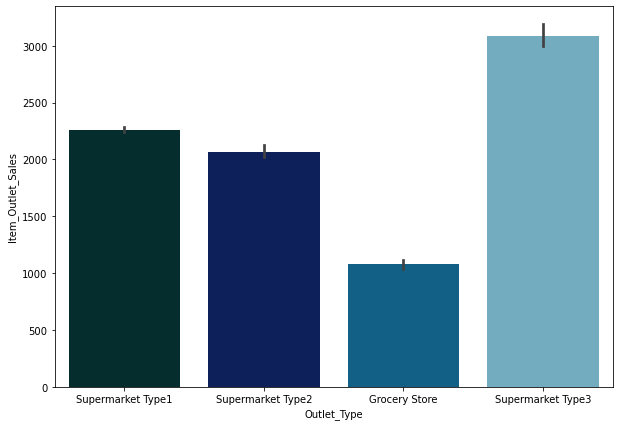

In [37]:
plt.figure(figsize=(10,7))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data_mart,palette='ocean')

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

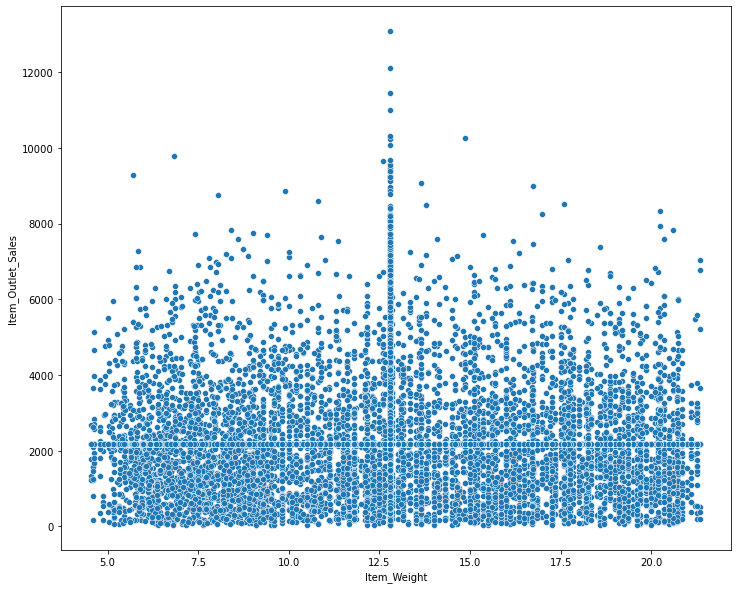

In [38]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=data_mart,palette='ocean')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>

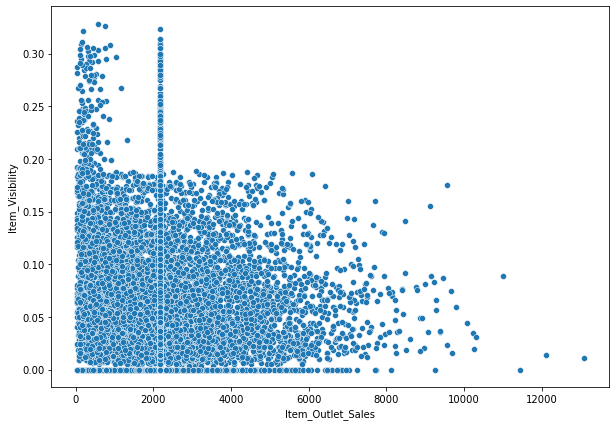

In [39]:
plt.figure(figsize=(10,7))
sns.scatterplot(y='Item_Visibility',x='Item_Outlet_Sales',data=data_mart,palette='ocean')

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

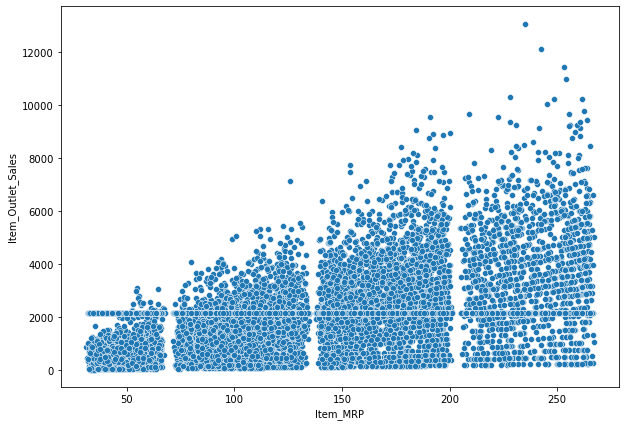

In [40]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=data_mart,palette='ocean')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

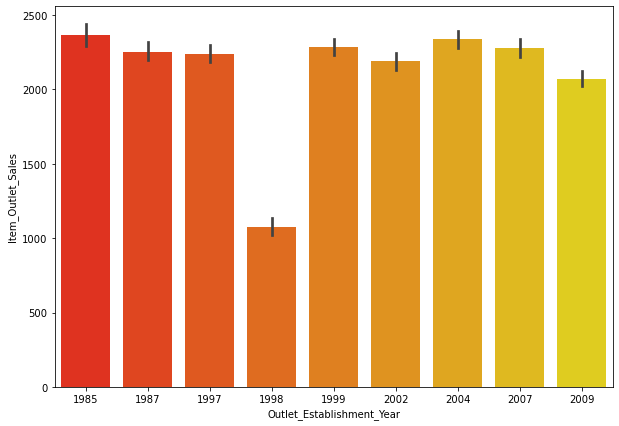

In [41]:
plt.figure(figsize=(10,7))
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=data_mart,palette='autumn')

# Multivariate Analysis

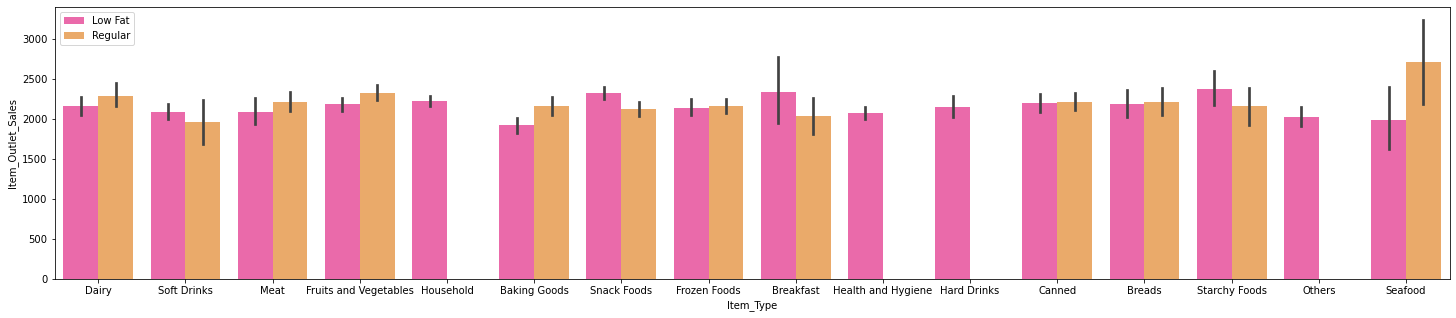

In [42]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=data_mart,palette='spring')
plt.legend()

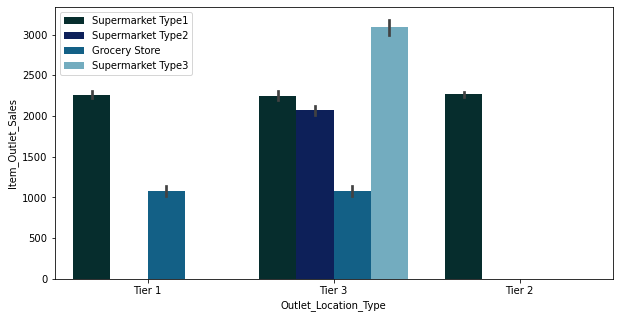

In [43]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=data_mart,palette='ocean')
plt.legend()

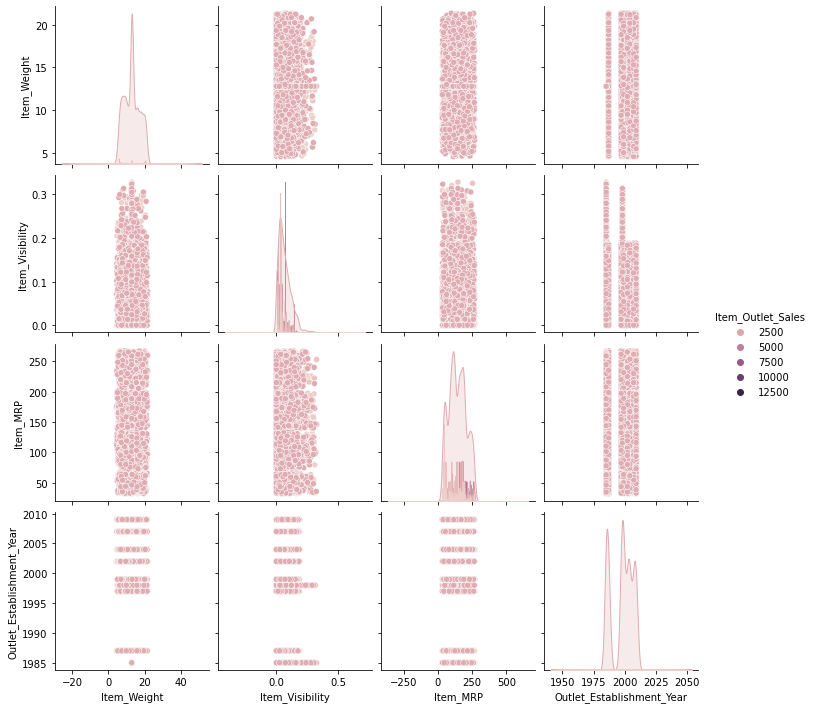

In [44]:
sns.pairplot(data=data_mart,hue="Item_Outlet_Sales")

## Normal Distribution Curve:

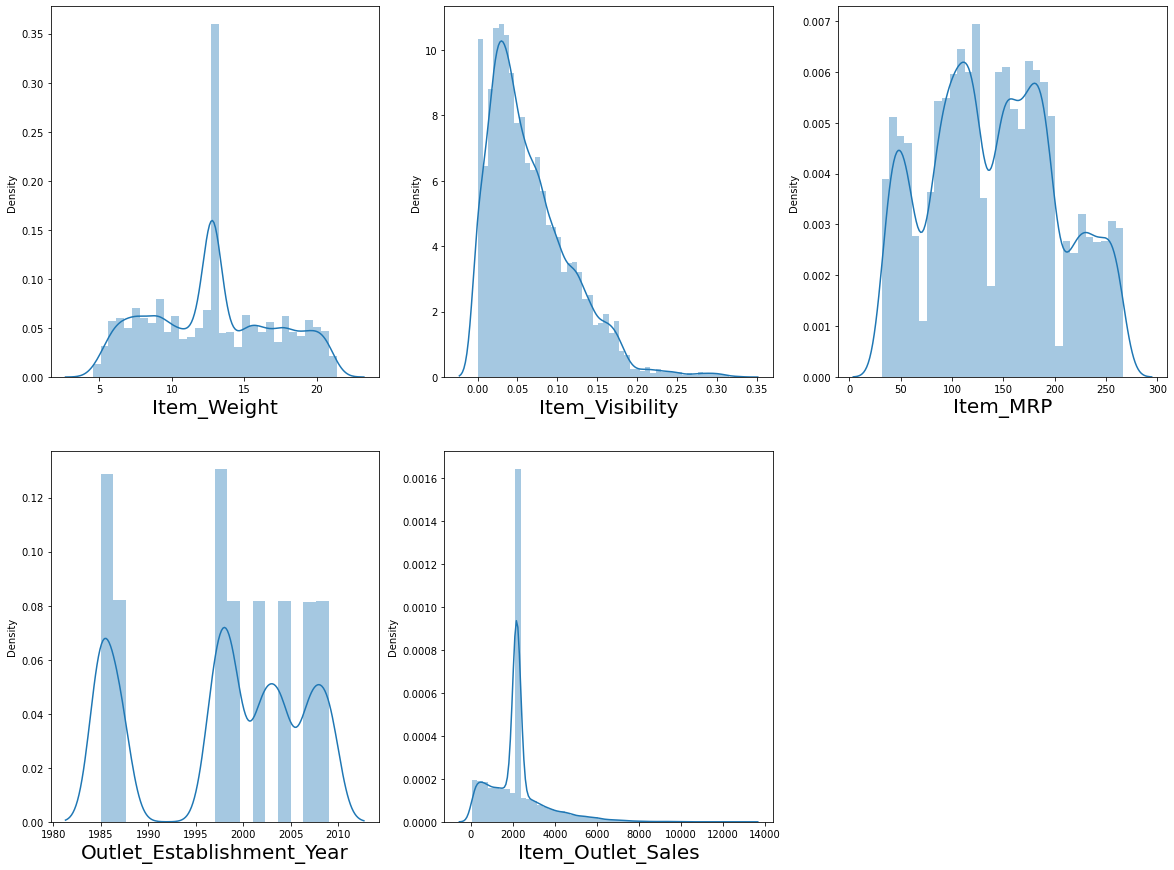

In [45]:
collist=[ 'Item_Weight',  'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
plt.figure(figsize=(20,15))
plotnumber = 1

for column in data_mart[collist]:
    if plotnumber<=12:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(data_mart[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Checking Correlation

In [46]:
data_mart.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.013641,0.033002,0.000462,0.008569
Item_Visibility,-0.013641,1.000000,-0.006351,-0.083678,-0.099903
Item_MRP,0.033002,-0.006351,1.000000,0.000141,0.440979
Outlet_Establishment_Year,0.000462,-0.083678,0.000141,1.000000,-0.038061
Item_Outlet_Sales,0.008569,-0.099903,0.440979,-0.038061,1.000000


This gives the correlation between the denpendent and independent variables.

In [47]:
data_mart.corr()["Item_Outlet_Sales"].sort_values()

Item_Visibility             -0.099903
Outlet_Establishment_Year   -0.038061
Item_Weight                  0.008569
Item_MRP                     0.440979
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

#### checking correlation with heatmap

<AxesSubplot:>

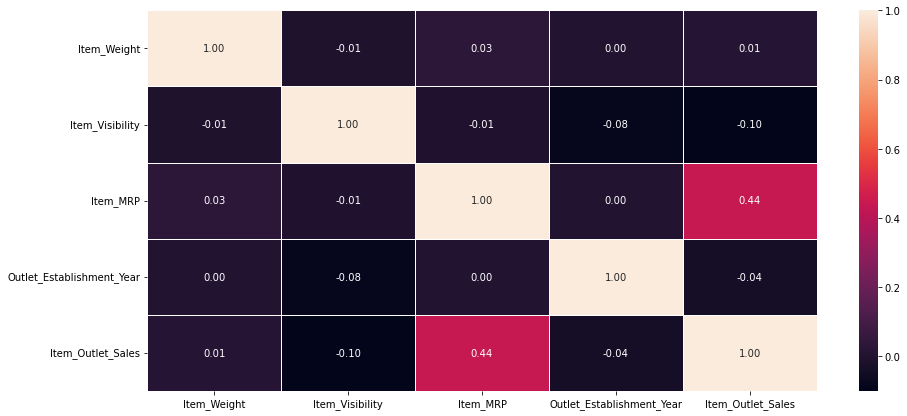

In [48]:
plt.figure(figsize=(15,7))
sns.heatmap(data_mart.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

# Outcome of Correlation

1. Item_Weight has 1 percent correlation with the target column which can be considered as good correlation and positively correlated.

2. Item_Visibility has -10 percent correlation with the target column which can be considered as weak correlation and negatively correlated.

3. Item_MRP has 44 percent correlation with the target column which can be considered as strong correlation and positively correlated.

4. Outlet_Establishment_Year has -4 percent correlation with the target column which can be considered as good correlation and negatively correlated.

Max Correlation: Item_MRP

Min Correlation: Item_Visibility

### Checking correlation with barplot

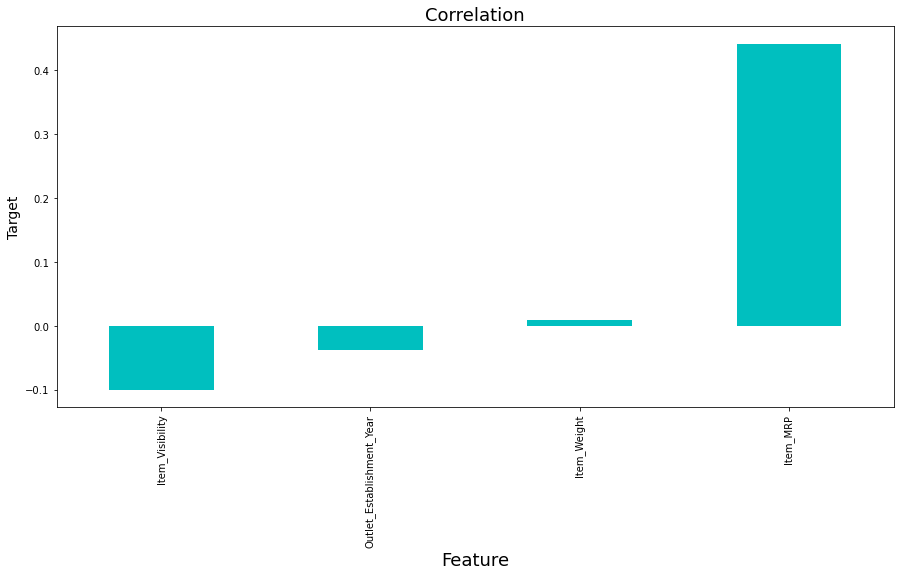

In [49]:
plt.figure(figsize=(15,7))
data_mart.corr()['Item_Outlet_Sales'].sort_values(ascending=True).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

### Observation of the correlation:

Positively correlated with : Item_Weight

Negatively correlated with : Outlet_Establishment_Year and Item_Visibility

In heatmap we also observed that the Item_Weight column has no relation with the target variable.

# Ordinal Encoding

In [50]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()

In [51]:
#features = ['Item_Identifier', 'Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Establishment_Year']

### Transforming Categorical column into Continuous column using Ordinal Encoding

In [52]:
data_mart["Outlet_Type"] = encoder.fit_transform(data_mart[["Outlet_Type"]])
data_mart['Outlet_Location_Type'] =encoder.fit_transform(data_mart[["Outlet_Location_Type"]])
data_mart['Outlet_Size'] =encoder.fit_transform(data_mart[["Outlet_Size"]])
data_mart['Item_Fat_Content'] =encoder.fit_transform(data_mart[["Item_Fat_Content"]])
data_mart['Item_Type'] =encoder.fit_transform(data_mart[["Item_Type"]])

##### Checking dataset after transformation

In [53]:
data_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0.0,0.016047,4.0,249.8092,OUT049,1999,1.0,0.0,1.0,3735.1380
1,DRC01,5.92,1.0,0.019278,14.0,48.2692,OUT018,2009,1.0,2.0,2.0,443.4228
2,FDN15,17.50,0.0,0.016760,10.0,141.6180,OUT049,1999,1.0,0.0,1.0,2097.2700
3,FDX07,19.20,1.0,0.000000,6.0,182.0950,OUT010,1998,1.0,2.0,0.0,732.3800
4,NCD19,8.93,0.0,0.000000,9.0,53.8614,OUT013,1987,0.0,2.0,1.0,994.7052


# Dropping irrelevant columns

In [54]:
data_mart = data_mart.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

###### Checking columns after dropping

In [55]:
data_mart.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [56]:
data_mart.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0.0,0.016047,4.0,249.8092,1999,1.0,0.0,1.0,3735.1380
1,5.92,1.0,0.019278,14.0,48.2692,2009,1.0,2.0,2.0,443.4228
2,17.50,0.0,0.016760,10.0,141.6180,1999,1.0,0.0,1.0,2097.2700
3,19.20,1.0,0.000000,6.0,182.0950,1998,1.0,2.0,0.0,732.3800
4,8.93,0.0,0.000000,9.0,53.8614,1987,0.0,2.0,1.0,994.7052


# Checking Outliers

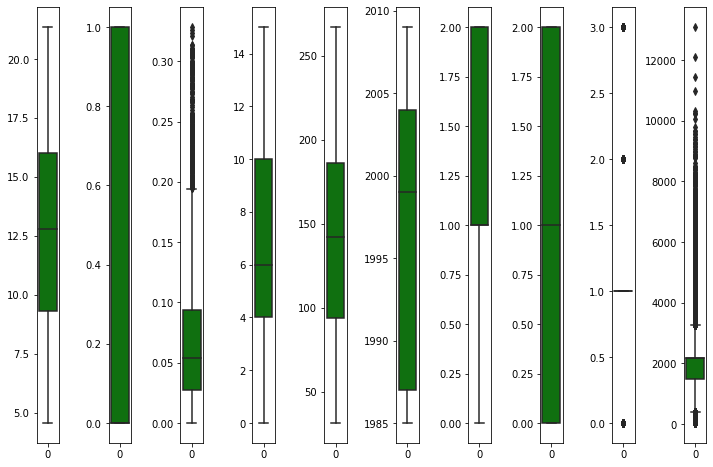

In [57]:
collist=data_mart.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=data_mart[collist[i]],color='green',orient='v')
    plt.tight_layout()

### Observation:

Outliers present in columns: "Item_Visibility", "Outlet_Type" and "Item_Outlet_Sales".

But we will not remove Outliers from "Item_Outlet_Sales" column as it Target column.

Outliers not present in columns: "Item_Weight", "Item_Fat_Content", "Item_Visibility", "Outlet_Establishment_Year", "Item_MRP", "Outlet_Size" and "Outlet_Location_Type".

# Removing Outliers

### 1. Zscore method using Scipy

In [58]:
from scipy.stats import zscore

#  Outliers will be removed only from Continuous column variable i.e; Item_Visibility and Item_Outlet_Sales. 
# We will not remove outliers from Categorical column i.e; Outlet_Type and Target column i.e; Item_Outlet_Sales.

variable = data_mart[['Item_Visibility']]

z=np.abs(zscore(variable))

# Creating new dataframe
big_mart = data_mart[(z<3).all(axis=1)]
big_mart.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0.0,0.016047,4.0,249.8092,1999,1.0,0.0,1.0,3735.1380
1,5.92,1.0,0.019278,14.0,48.2692,2009,1.0,2.0,2.0,443.4228
2,17.50,0.0,0.016760,10.0,141.6180,1999,1.0,0.0,1.0,2097.2700
3,19.20,1.0,0.000000,6.0,182.0950,1998,1.0,2.0,0.0,732.3800
4,8.93,0.0,0.000000,9.0,53.8614,1987,0.0,2.0,1.0,994.7052


In [59]:
z.head()

,Item_Visibility
0,0.969852
1,0.907063
2,0.956000
3,1.281712
4,1.281712


In [60]:
print("Old DataFrame data in Rows and Column:",data_mart.shape)
print("New DataFrame data in Rows and Column:",big_mart.shape)
print("Total Dropped rows:",data_mart.shape[0]-big_mart.shape[0])

Old DataFrame data in Rows and Column: (14204, 10)
New DataFrame data in Rows and Column: (14031, 10)
Total Dropped rows: 173


## Percentage Data Loss using Zscore 

In [61]:
loss_percent=(14204-14031)/14204*100
print(loss_percent,"%")

1.2179667699239651 %


## 2. IQR (Inter Quantile Range) method

In [62]:
#1st quantile
Q1=variable.quantile(0.25)

# 3rd quantile
Q3=variable.quantile(0.75)

#IQR
IQR=Q3 - Q1
mart_sales=data_mart[~((data_mart < (Q1 - 1.5 * IQR)) |(data_mart > (Q3 + 1.5 * IQR))).any(axis=1)]

In [63]:
print("Old DataFrame data in Rows and Column:",data_mart.shape)
print("\nNew DataFrame data in Rows and Column:",mart_sales.shape)
print("\nTotal Dropped rows:",mart_sales.shape[0]-data_mart.shape[0])

Old DataFrame data in Rows and Column: (14204, 10)

New DataFrame data in Rows and Column: (13943, 10)

Total Dropped rows: -261


## Percentage Data Loss using IQR

In [64]:
loss_perc = (14204-13943)/14204*100
loss_perc

1.8375105604055197

We can check by using IQR method there is large data loss in comparision to Zscore method. So, we will consider Zscore method.


# Checking for the skewness

In [65]:
big_mart.skew()

Item_Weight                  0.110310
Item_Fat_Content             0.618503
Item_Visibility              0.796921
Item_Type                    0.097428
Item_MRP                     0.130743
Outlet_Establishment_Year   -0.409922
Outlet_Size                 -0.082716
Outlet_Location_Type        -0.213255
Outlet_Type                  0.948947
Item_Outlet_Sales            1.532141
dtype: float64

Skewness threshold taken is +/-0.50, Columns which are having skewness: Item_Fat_Content, Item_Visibility, Outlet_Type and Item_Outlet_Sales

The Outlet_Type column data is highly skewed

All the columns are not normallly distributed

Since Item_Fat_Content and Outlet_Type is categorical column so we will not remove skewness from them. Also we will not remove skewness from Item_Outlet_Sales column as it is Target column.

Only we will remove skewness from Item_Visibility as this column contains continuous data.

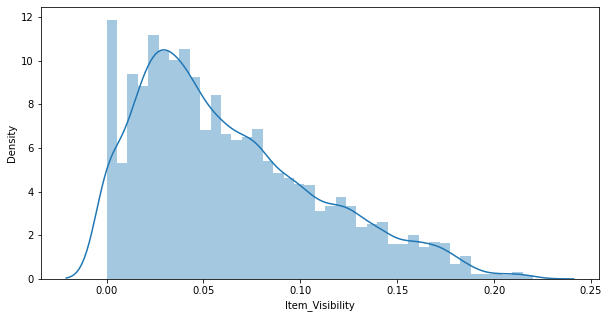

In [66]:
# Data visualization of skewed continuous column using distplot 
plt.figure(figsize=(10,5), facecolor='white')
sns.distplot(big_mart["Item_Visibility"])
plt.show()

# Data preprocessing


### Spliting data into Target and Features:

In [67]:
x=big_mart.drop("Item_Outlet_Sales",axis=1)
y=big_mart["Item_Outlet_Sales"]

In [68]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0.0,0.016047,4.0,249.8092,1999,1.0,0.0,1.0
1,5.92,1.0,0.019278,14.0,48.2692,2009,1.0,2.0,2.0
2,17.50,0.0,0.016760,10.0,141.6180,1999,1.0,0.0,1.0
3,19.20,1.0,0.000000,6.0,182.0950,1998,1.0,2.0,0.0
4,8.93,0.0,0.000000,9.0,53.8614,1987,0.0,2.0,1.0


In [69]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [70]:
x.shape

(14031, 9)

In [71]:
y.shape

(14031,)

# Removing skewness using yeo-johnson method

In [72]:
from sklearn.preprocessing  import power_transform

In [73]:
x=power_transform(x,method='yeo-johnson')
x

array([[-0.8005234 , -0.73749851, -1.14426379, ..., -0.28508892,
        -1.38042242, -0.14722324],
       [-1.72039319,  1.35593495, -1.0343603 , ..., -0.28508892,
         1.08998626,  1.03402734],
       [ 1.0933265 , -0.73749851, -1.11974679, ..., -0.28508892,
        -1.38042242, -0.14722324],
       ...,
       [-0.62323515, -0.73749851,  0.41593976, ..., -0.28508892,
        -0.13734825, -0.14722324],
       [ 0.61827924,  1.35593495, -1.739559  , ..., -0.28508892,
        -0.13734825, -0.14722324],
       [-0.74948028,  1.35593495,  0.99328587, ..., -0.28508892,
        -0.13734825, -0.14722324]])

In [74]:
x.shape

(14031, 9)

# checking skewness after removal

In [75]:
big_mart.skew()

Item_Weight                  0.110310
Item_Fat_Content             0.618503
Item_Visibility              0.796921
Item_Type                    0.097428
Item_MRP                     0.130743
Outlet_Establishment_Year   -0.409922
Outlet_Size                 -0.082716
Outlet_Location_Type        -0.213255
Outlet_Type                  0.948947
Item_Outlet_Sales            1.532141
dtype: float64

## Data visualization of skewed continuous column using distplot

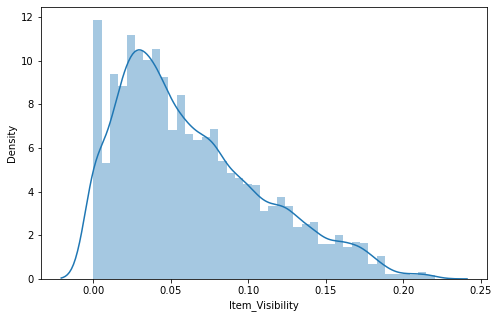

In [76]:
plt.figure(figsize=(8,5), facecolor='white')
sns.distplot(big_mart["Item_Visibility"])
plt.show()

The data is not normal but the skewness has got removed compared to the old data.

But we can see that the feature variables are negatively skewed and it will inverse relationship between feature variables and target variables. So to remove this, we will use variance threshold method.

## Variance Threshold Method

It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.

In [77]:
from sklearn.feature_selection import VarianceThreshold

In [78]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [79]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [80]:
x =pd.DataFrame(x)

In [81]:
x.columns[var_threshold.get_support()]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [82]:
x.shape

(14031, 9)

In [83]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


So we can see that, with the help of variance threshold method, we got to know all the features here are important. So now we will use the SelectKBest method.


# SelectKBest method

In [84]:
from sklearn.feature_selection import SelectKBest, f_classif

In [85]:
best_fit = SelectKBest(score_func = f_classif, k =9)
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [86]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(9,'Score'))

   Feature     Score
4        4  2.272480
8        8  1.907329
5        5  1.144840
3        3  1.135289
1        1  1.121823
2        2  1.121258
7        7  1.027627
0        0  1.021437
6        6  1.002798


Selecting the best features based on above scores, we can see that the column "Outlet_Size" has most lowest features for the prediction, so we will drop this column.

In [87]:
x

,0,1,2,3,4,5,6,7,8
0,-0.800523,-0.737499,-1.144264,-0.713425,1.626676,0.038527,-0.285089,-1.380422,-0.147223
1,-1.720393,1.355935,-1.034360,1.503212,-1.603814,1.453283,-0.285089,1.089986,1.034027
2,1.093327,-0.737499,-1.119747,0.682379,0.080942,0.038527,-0.285089,-1.380422,-0.147223
3,1.447887,1.355935,-1.739559,-0.217166,0.691376,-0.085965,-0.285089,1.089986,-1.980118
4,-0.895812,-0.737499,-1.739559,0.466368,-1.484025,-1.282406,-1.921351,1.089986,-0.147223
...,...,...,...,...,...,...,...,...,...
14026,-0.498844,1.355935,-1.233285,1.303659,0.076191,-0.207638,1.398617,-1.380422,-0.147223
14027,-1.248381,1.355935,1.527803,1.699524,0.501083,1.453283,-0.285089,1.089986,1.034027
14028,-0.623235,-0.737499,0.415940,0.244981,-0.287626,0.429565,-0.285089,-0.137348,-0.147223
14029,0.618279,1.355935,-1.739559,-0.979490,1.151972,1.143927,-0.285089,-0.137348,-0.147223


In [88]:
xbest = x.drop([6],axis=1)

In [89]:
xbest

,0,1,2,3,4,5,7,8
0,-0.800523,-0.737499,-1.144264,-0.713425,1.626676,0.038527,-1.380422,-0.147223
1,-1.720393,1.355935,-1.034360,1.503212,-1.603814,1.453283,1.089986,1.034027
2,1.093327,-0.737499,-1.119747,0.682379,0.080942,0.038527,-1.380422,-0.147223
3,1.447887,1.355935,-1.739559,-0.217166,0.691376,-0.085965,1.089986,-1.980118
4,-0.895812,-0.737499,-1.739559,0.466368,-1.484025,-1.282406,1.089986,-0.147223
...,...,...,...,...,...,...,...,...
14026,-0.498844,1.355935,-1.233285,1.303659,0.076191,-0.207638,-1.380422,-0.147223
14027,-1.248381,1.355935,1.527803,1.699524,0.501083,1.453283,1.089986,1.034027
14028,-0.623235,-0.737499,0.415940,0.244981,-0.287626,0.429565,-0.137348,-0.147223
14029,0.618279,1.355935,-1.739559,-0.979490,1.151972,1.143927,-0.137348,-0.147223


Text(0.5, 1.0, 'The curve after Feature  selection with 8 features')

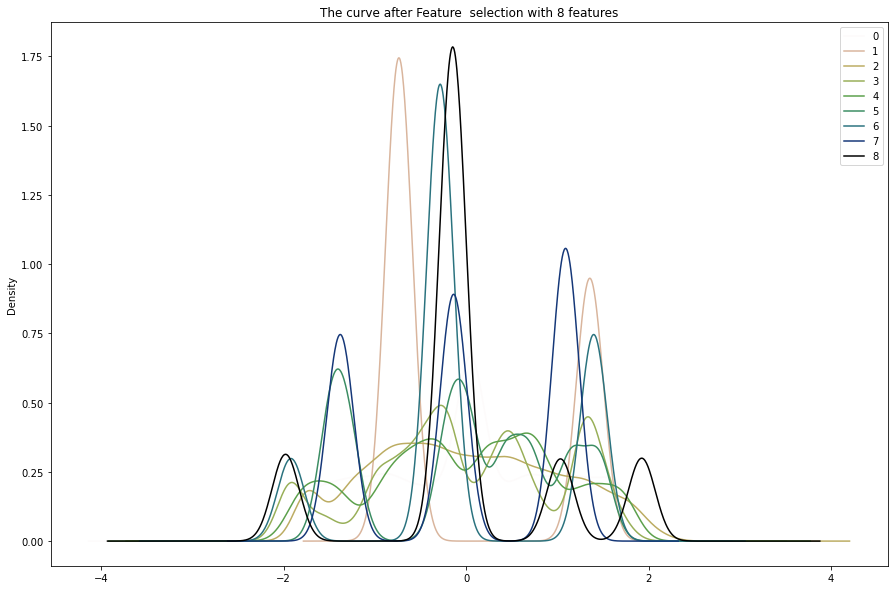

In [90]:
x.plot( kind='kde', figsize=(15,10), cmap='gist_earth_r')
plt.title('The curve after Feature  selection with 8 features')

Now, we have completed features selection process through using 2 techniques.

## Creating Model

In [91]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, classification_report,  mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.metrics import classification_report

In [ ]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(xbest,y,test_size = .20, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

# Creating train-test-split

In [ ]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test = train_test_split(xbest,y,test_size = .20, random_state = 28)

As it is a continuous data , so we have to understand this by Regression problem

# Regression Algorithms

### Linear Regression

In [ ]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('Mean abs error:',mean_absolute_error(y_test, predLR))
print('Mean squared error:',mean_squared_error(y_test, predLR))

### Checking the performance of the model by graph

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predLR,cmap='set1')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Outlet sales")
plt.ylabel("Predicted Outlet sales")
plt.title("Linear regressor")
plt.show()

# Random forest Regression Model

In [ ]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=28)
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))

### Checking the performance of the model by graph

In [ ]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predRFR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual outlet sales")
plt.ylabel("Predicted outlet sales")
plt.title("Random forest regressor")
plt.show()

# KNN regressor

In [ ]:
# Checking R2 score for KNN regressor
knn=KNN(n_neighbors=9 )
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))

### Checking the performance of the model by graph

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predknn,color='orange')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Outlet sales")
plt.ylabel("Predicted Outlet sales")
plt.title("K-nearest neighbors  regressor")

# Support Vector Regression Model

In [ ]:
# Checking R2 score for svr
sv= SVR(kernel='linear')
sv.fit(x_train,y_train)

#prediction
predsv=sv.predict(x_test)
print('R2_Score:',r2_score(y_test,predsv))
print('Mean abs error:',mean_absolute_error(y_test, predsv))
print('Mean squared error:',mean_squared_error(y_test, predsv))

#### Checking the performance of the model by graph

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predsv,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual outlet sales")
plt.ylabel("Predicted Outlet sales")
plt.title("Support vector  regressor")
plt.show()

# Grdient boosting Regressor

In [ ]:
# Checking R2 score for GBR
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=29, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)

#prediction
predGb=Gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predGb))
print('Mean abs error:',mean_absolute_error(y_test, predGb))
print('Mean squared error:',mean_squared_error(y_test, predGb))

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predGb,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual outlet sales")
plt.ylabel("Predicted Outlet sales")
plt.title("Support vector  regressor")
plt.show()

# Checking cross validation score.


### Checking CV score for Linear Regression

In [ ]:
print('The CV score  for Linear_regression is :',cross_val_score(LR,x,y,cv=9).mean())

### Checking cv score for Random Forest Regression

In [ ]:
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x,y,cv=9).mean())

### Checking cv score for KNN Regression

In [ ]:
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x,y,cv=9).mean())

### Checking cv score for GBR Regression

In [ ]:
print('The CV score  for  the GBR regressor is :',cross_val_score(sv,x,y,cv=9).mean())

So accroding to the Cross validation score of all the model we can see that the best cv score is here isfor the gradient boosting regressor

# Hyper Parameter Tuning


### The Gradient boosting regressor with GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter = {'n_estimators':[100,200,300,400],
             'learning_rate':[0.1,0.01,0.001,1],
             'subsample': [0.1,0.2,0.3,0.5,1],
             'max_depth':[1,2,3,4],
             'alpha':[0.1,0.01,0.001,1]}

In [ ]:
GridCV = GridSearchCV(GradientBoostingRegressor(),parameter,cv=6,n_jobs = 3,verbose = 2)

In [ ]:
GridCV.fit(x_train,y_train)

In [ ]:
GridCV.best_params_

In [ ]:
GB = GradientBoostingRegressor(n_estimators=400,alpha=0.001,learning_rate= 0.01, max_depth= 3, subsample = 1)
GB.fit(x_train, y_train)gbpred = GB.predict(x_test)

acc = r2_score(y_test,gbpred)
print(acc*100)

so after the Hypertuning now we have got a descent accuracy score of 62% on Gradient boosting

In [ ]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=gbpred,palette='Set2')
sns.kdeplot(x=y_test,y=gbpred, cmap='Set1')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual outlet sales by GBR")
plt.ylabel("Predicted outlet  sales by GBR")
plt.title(" Final  metrics of  accuracy  from Hypertuning of Gradient boosting regressor")
plt.show()

### Saving The Predictive Model

In [ ]:
import pickle
filename='Big_Mart_Sale_Project.pickle'
pickle.dump(GridCV,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

#### Checking predicted and original values

In [ ]:
import numpy as np
a = np.array(y_test)
predicted = np.array(GB.predict(x_test))
Big_Mart_Sale = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Big_Mart_Sale

As we can see, predicted and original values matches approx 100%.

In [ ]:
plt.figure(figsize=(15,12))
sns.kdeplot(data=Big_Mart_Sale, palette='gnuplot',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

In [ ]:
model =big_mart.to_csv('Big_Mart_Sale.csv')
model